In [1]:
# Linking Google Colab to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#changing working directory
!pwd
import os
os.chdir('/content/gdrive/MyDrive/ML_Projects/May_JOBATHON')
!pwd

/content
/content/gdrive/MyDrive/ML_Projects/May_JOBATHON


In [3]:
# Loading train and test data
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# Total Number of datapoints in train
print(train.shape)

# Total Number of datapoints in test
print(test.shape)

(245725, 11)
(105312, 10)


In [5]:
# showing first 5 datapoints
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
# Checking for duplicates
train.duplicated().sum()

0

In [7]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [8]:
train.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [10]:
# Checking Null Elemetage
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [11]:
# filling null value
train['Credit_Product'].fillna('others', inplace = True)

In [12]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [13]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [14]:
# filling null values in test data
test['Credit_Product'].fillna('others', inplace = True)

In [15]:
test.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

#EDA and Preprocessing

In [16]:
# Code for ploting graph of categorical features

def uni_graph(data, feature, target):
  
  import matplotlib.pyplot as plt
  import numpy as np
  a = data[feature][data[target]==1]
  b = data[feature][data[target]==0]
  c = len(set(data[feature].value_counts()))

  labels = data[feature].value_counts().keys()
  interested = a.value_counts().values
  not_interested = b.value_counts().values
  
  if c < 10:
    fig, ax = plt.subplots(figsize=(8, 6))
  else:
    fig, ax = plt.subplots(figsize=(20, 10))

  ax.bar(labels, not_interested,  label='Not_Interested')
  ax.bar(labels, interested, bottom=not_interested, label='Interested')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title('Percentage of interested lead vs {}'.format(feature))
  plt.legend()


  pos = [0]*2*c
  i = 0
  for rect in ax.patches[c:]:
    height = rect.get_height()
    per = 100*height/(height + ax.patches[i].get_height())
    ypos = rect.get_y() + height/2
    total_per = 100*height/train.shape[0]
    ax.text(rect.get_x() + rect.get_width()/2., ypos, '%d' % int(per)+'%', ha='center', va='bottom')
    ax.text(rect.get_x() + rect.get_width()/2., ypos + height/2, '%d' % int(total_per)+'%', ha='center', va='bottom')
    pos[i]=np.round(per,2)
    pos[i+c]=np.round(total_per,2)
    i+=1

  plt.show()
  print('Total {} unique values are present in the {} column.'.format(c, feature))
  for i in range(c):
    print('Contrivbution of {} towards Is_Lead within category is {}% and overall is {}%'.format(labels.values[i],pos[i],pos[i+c]))
  return labels, pos[0:c], pos[c:]

In [17]:
# code for taking features for modelling
def get_feature(x, feature, label):

  for i in range(len(labels)):
    if x ==label.values[i]:
      return feature[i]

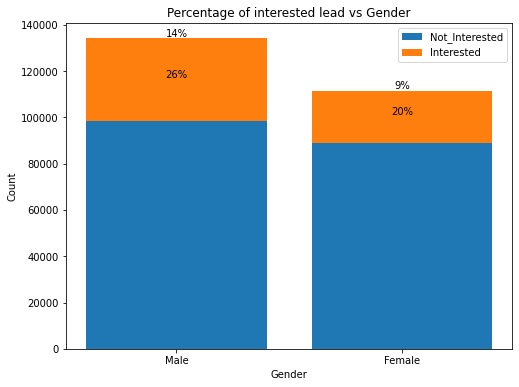

Total 2 unique values are present in the Gender column.
Contrivbution of Male towards Is_Lead within category is 26.52% and overall is 14.48%
Contrivbution of Female towards Is_Lead within category is 20.36% and overall is 9.24%


In [18]:
labels, feature_1, feature_2 = uni_graph(train, 'Gender', 'Is_Lead')

In [19]:
# making new features using lambda functions
train['Gender_1'] = train['Gender'].apply(lambda x: get_feature(x, feature_1, labels))
train['Gender_2'] = train['Gender'].apply(lambda x: get_feature(x, feature_2, labels))
test['Gender_1'] = test['Gender'].apply(lambda x: get_feature(x, feature_1, labels))
test['Gender_2'] = test['Gender'].apply(lambda x: get_feature(x, feature_2, labels))

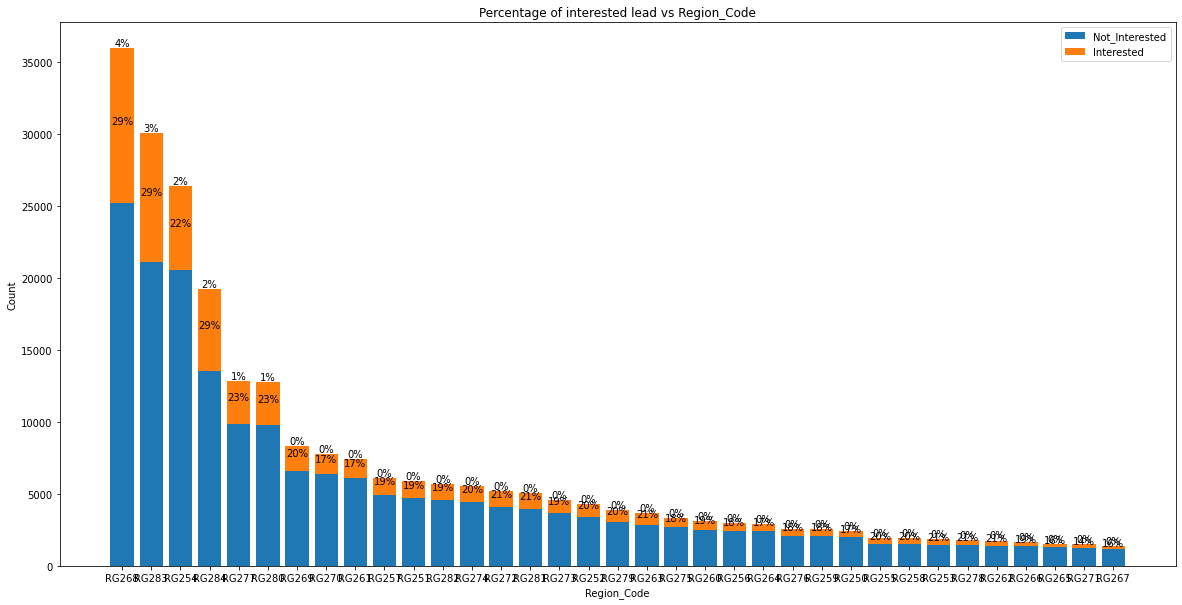

Total 35 unique values are present in the Region_Code column.
Contrivbution of RG268 towards Is_Lead within category is 29.98% and overall is 4.38%
Contrivbution of RG283 towards Is_Lead within category is 29.6% and overall is 3.62%
Contrivbution of RG254 towards Is_Lead within category is 22.07% and overall is 2.37%
Contrivbution of RG284 towards Is_Lead within category is 29.73% and overall is 2.32%
Contrivbution of RG277 towards Is_Lead within category is 23.4% and overall is 1.22%
Contrivbution of RG280 towards Is_Lead within category is 23.35% and overall is 1.21%
Contrivbution of RG269 towards Is_Lead within category is 20.88% and overall is 0.71%
Contrivbution of RG270 towards Is_Lead within category is 17.86% and overall is 0.56%
Contrivbution of RG261 towards Is_Lead within category is 17.32% and overall is 0.52%
Contrivbution of RG257 towards Is_Lead within category is 19.18% and overall is 0.48%
Contrivbution of RG251 towards Is_Lead within category is 19.7% and overall is 0

In [20]:
labels, feature_1, feature_2 = uni_graph(train, 'Region_Code', 'Is_Lead')

In [21]:
train['Region_Code_1'] = train['Region_Code'].apply(lambda x: get_feature(x, feature_1, labels))
train['Region_Code_2'] = train['Region_Code'].apply(lambda x: get_feature(x, feature_2, labels))
test['Region_Code_1'] = test['Region_Code'].apply(lambda x: get_feature(x, feature_1, labels))
test['Region_Code_2'] = test['Region_Code'].apply(lambda x: get_feature(x, feature_2, labels))

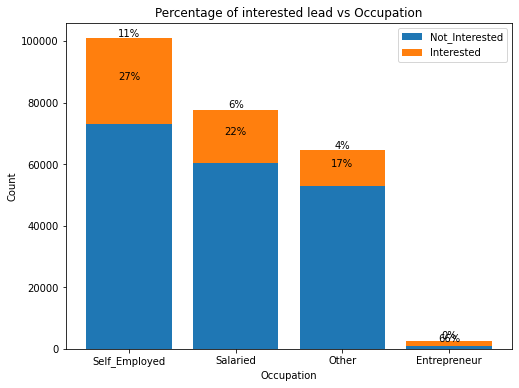

Total 4 unique values are present in the Occupation column.
Contrivbution of Self_Employed towards Is_Lead within category is 27.6% and overall is 11.33%
Contrivbution of Salaried towards Is_Lead within category is 22.12% and overall is 7.0%
Contrivbution of Other towards Is_Lead within category is 17.83% and overall is 4.68%
Contrivbution of Entrepreneur towards Is_Lead within category is 66.07% and overall is 0.72%


In [22]:
labels, feature_1, feature_2 = uni_graph(train, 'Occupation', 'Is_Lead')

In [23]:
train['Occupation_1'] = train['Occupation'].apply(lambda x: get_feature(x, feature_1, labels))
train['Occupation_2'] = train['Occupation'].apply(lambda x: get_feature(x, feature_2, labels))
test['Occupation_1'] = test['Occupation'].apply(lambda x: get_feature(x, feature_1, labels))
test['Occupation_2'] = test['Occupation'].apply(lambda x: get_feature(x, feature_2, labels))

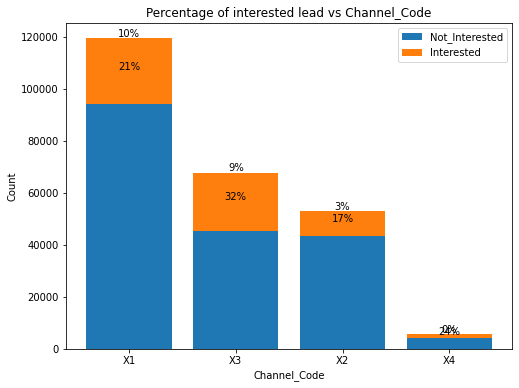

Total 4 unique values are present in the Channel_Code column.
Contrivbution of X1 towards Is_Lead within category is 21.11% and overall is 10.26%
Contrivbution of X3 towards Is_Lead within category is 32.79% and overall is 9.04%
Contrivbution of X2 towards Is_Lead within category is 17.9% and overall is 3.86%
Contrivbution of X4 towards Is_Lead within category is 24.78% and overall is 0.56%


In [24]:
labels, feature_1, feature_2 = uni_graph(train, 'Channel_Code', 'Is_Lead')

In [25]:
train['Channel_Code_1'] = train['Channel_Code'].apply(lambda x: get_feature(x, feature_1, labels))
train['Channel_Code_2'] = train['Channel_Code'].apply(lambda x: get_feature(x, feature_2, labels))
test['Channel_Code_1'] = test['Channel_Code'].apply(lambda x: get_feature(x, feature_1, labels))
test['Channel_Code_2'] = test['Channel_Code'].apply(lambda x: get_feature(x, feature_2, labels))

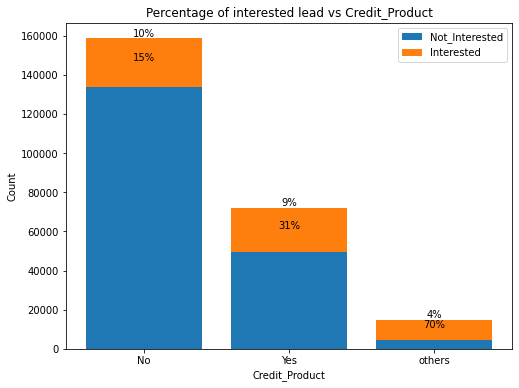

Total 3 unique values are present in the Credit_Product column.
Contrivbution of No towards Is_Lead within category is 15.74% and overall is 10.16%
Contrivbution of Yes towards Is_Lead within category is 31.5% and overall is 9.23%
Contrivbution of others towards Is_Lead within category is 70.95% and overall is 4.32%


In [26]:
labels, feature_1, feature_2 = uni_graph(train, 'Credit_Product', 'Is_Lead')

In [27]:
train['Credit_Product_1'] = train['Credit_Product'].apply(lambda x: get_feature(x, feature_1, labels))
train['Credit_Product_2'] = train['Credit_Product'].apply(lambda x: get_feature(x, feature_2, labels))
test['Credit_Product_1'] = test['Credit_Product'].apply(lambda x: get_feature(x, feature_1, labels))
test['Credit_Product_2'] = test['Credit_Product'].apply(lambda x: get_feature(x, feature_2, labels))

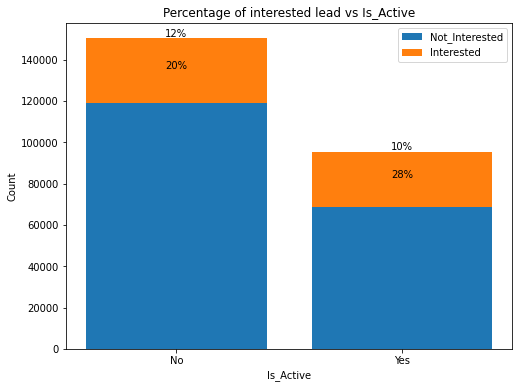

Total 2 unique values are present in the Is_Active column.
Contrivbution of No towards Is_Lead within category is 20.82% and overall is 12.73%
Contrivbution of Yes towards Is_Lead within category is 28.3% and overall is 10.99%


In [28]:
labels, feature_1, feature_2 = uni_graph(train, 'Is_Active', 'Is_Lead')

In [29]:
train['Is_Active_1'] = train['Is_Active'].apply(lambda x: get_feature(x, feature_1, labels))
train['Is_Active_2'] = train['Is_Active'].apply(lambda x: get_feature(x, feature_2, labels))
test['Is_Active_1'] = test['Is_Active'].apply(lambda x: get_feature(x, feature_1, labels))
test['Is_Active_2'] = test['Is_Active'].apply(lambda x: get_feature(x, feature_2, labels))

In [30]:
# code for violin plot for numerical feature
def uni_num_graph(data, feature, target):
  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set_style("whitegrid")
  sns.violinplot(x=target, y=feature, data=data, size=10)
  plt.title("Violinplot for feature {}".format(feature))
  plt.show()
  

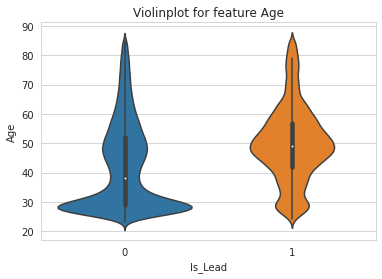

In [31]:
uni_num_graph(train, 'Age', 'Is_Lead')

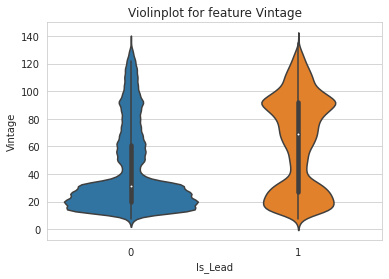

In [32]:
uni_num_graph(train, 'Vintage', 'Is_Lead')

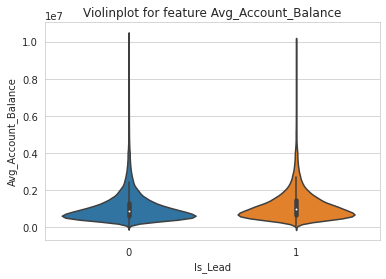

In [33]:
uni_num_graph(train, 'Avg_Account_Balance', 'Is_Lead')

In [34]:
# code for plotting probability distribution function
def draw_pdf(data, feature, target):
  import warnings
  import seaborn as sns
  import matplotlib.pyplot as plt
  warnings.filterwarnings("ignore") 
  sns.FacetGrid(data, hue=target, size=5).map(sns.distplot, feature).add_legend();
  plt.xlabel(target)
  plt.ylabel("probability")
  plt.title("PDF for feature {}".format(feature))
  plt.show();

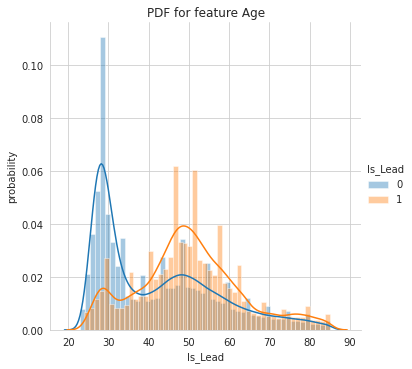

In [35]:
draw_pdf(train, 'Age', 'Is_Lead')

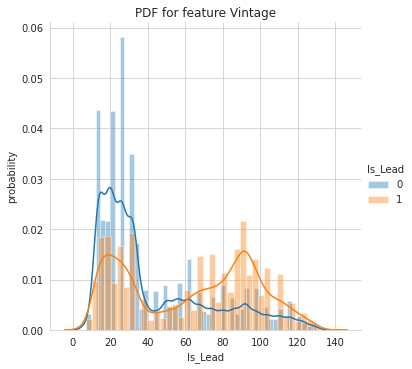

In [36]:
draw_pdf(train, 'Vintage', 'Is_Lead')

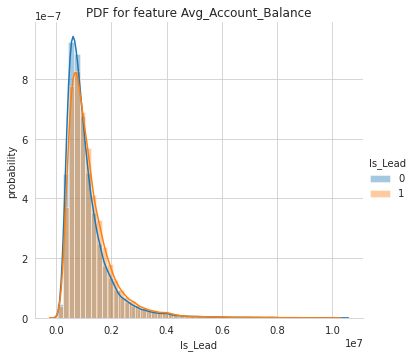

In [37]:
draw_pdf(train, 'Avg_Account_Balance', 'Is_Lead')

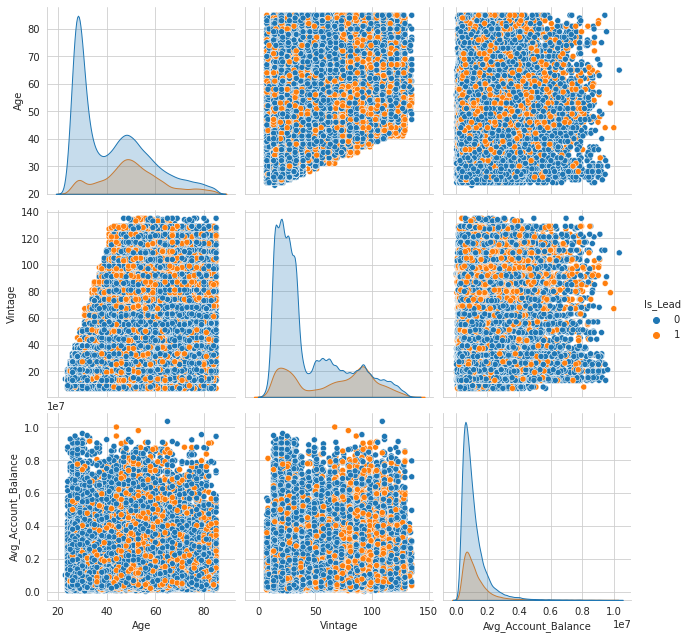

In [38]:
# code for Pair plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid");
sns.pairplot(train, vars=["Age", "Vintage", "Avg_Account_Balance"], hue="Is_Lead", size=3);
plt.show()

In [41]:
import numpy as np

train['log_Avg_Account_Balance'] = train['Avg_Account_Balance'].apply(lambda x : np.log(x))
test['log_Avg_Account_Balance'] = test['Avg_Account_Balance'].apply(lambda x : np.log(x))

The dataset is imbalance.

In [45]:
# Saving labels of test data for future use and removing it from the test data
labels = test['ID']
train = train.drop(['ID', 'Is_Lead'], axis = 1)

In [46]:
# checking shape of train and test data
print(train.shape)
print(test.shape)

(245725, 22)
(105312, 22)


In [47]:
# Code for OneHotEncoding
x = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', ]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first')
cat_train = enc.fit_transform(train[x])
cat_test = enc.transform(test[x])
print(f'One hot encoding done for {x}')
print("Train dimension : ", cat_train.shape)
print("Test dimension : ", cat_test.shape)

One hot encoding done for ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
Train dimension :  (245725, 44)
Test dimension :  (105312, 44)


In [48]:
x = [  'Age', 'Vintage',  'Avg_Account_Balance', 'Gender_1', 'Gender_2', 'Region_Code_1', 'Region_Code_2',
       'Occupation_1', 'Occupation_2', 'Channel_Code_1', 'Channel_Code_2',
       'Credit_Product_1', 'Credit_Product_2', 'Is_Active_1',
       'Is_Active_2', 'log_Avg_Account_Balance']

In [49]:
# code for Standardising Numerical Features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
num_train = ss.fit_transform(train[x])
num_test = ss.transform(test[x])
print(f'standard scaling done for {x}')
print("train dimension : ", num_train.shape)
print("test dimension : ", num_test.shape)

standard scaling done for ['Age', 'Vintage', 'Avg_Account_Balance', 'Gender_1', 'Gender_2', 'Region_Code_1', 'Region_Code_2', 'Occupation_1', 'Occupation_2', 'Channel_Code_1', 'Channel_Code_2', 'Credit_Product_1', 'Credit_Product_2', 'Is_Active_1', 'Is_Active_2', 'log_Avg_Account_Balance']
train dimension :  (245725, 16)
test dimension :  (105312, 16)


In [50]:
# Stacking all data
from scipy.sparse import hstack
X_train = hstack((cat_train, num_train))
X_test = hstack((cat_test, num_test))
print(X_train.shape)
print(X_test.shape)

(245725, 60)
(105312, 60)


# Modeling

In [51]:
# Code for Heatmap
def heatmap(clf):
  import seaborn as sns  
  import matplotlib.pyplot as plt
  train_score = clf.cv_results_.get('mean_train_score')
  test_score = clf.cv_results_.get('mean_test_score')

  h1 = pd.DataFrame(train_score.reshape(len(max_depth), len(n_estimators)), index = max_depth, columns = n_estimators)
  plt.figure(figsize = (8,5))
  a=sns.heatmap(h1, annot=True)
  a.yaxis.set_ticklabels(a.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
  a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
  plt.ylabel('Max Depth', size=12)
  plt.xlabel('Number of Tree', size=12)
  plt.title('Heat Map of Training Score\n',size=18)

  h2 = pd.DataFrame(test_score.reshape(len(max_depth), len(n_estimators)), index = max_depth, columns = n_estimators)
  plt.figure(figsize = (8,5))
  a=sns.heatmap(h2, annot=True)
  a.yaxis.set_ticklabels(a.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
  a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
  plt.ylabel('Max Depth', size=12)
  plt.xlabel('Number of Tree', size=12)
  plt.title('Heat Map of Test Score\n',size=18)
  plt.show()
  print("The best number of tree = ", clf.best_params_.get('n_estimators'), " and best depth is : ", clf.best_params_.get('max_depth')) 

In [ ]:
# Code for Hyperparameter Tuning of LighGBM
n_estimators=[5, 10, 20, 50, 100, ]
max_depth = [3, 5,  7, 10]
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators': n_estimators, 'max_depth': max_depth}
import lightgbm as lgb
clf = GridSearchCV(lgb.LGBMClassifier(n_jobs=-1, objective='binary', class_weight='balanced', random_seed=32),
                           parameter, cv=4, verbose=1,scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train, y)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt',
                                      class_weight='balanced',
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_seed=32,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_job

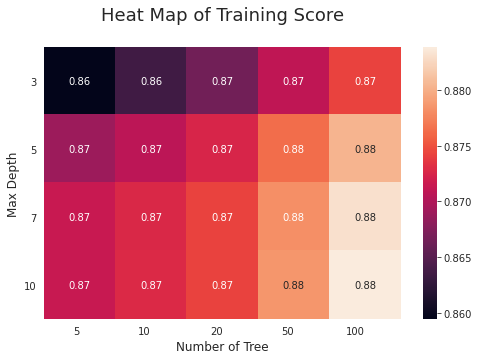

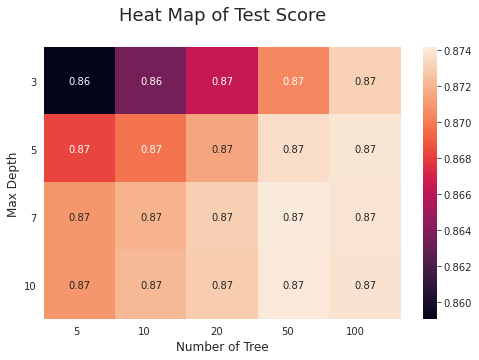

The best number of tree =  50  and best depth is :  7


In [ ]:
heatmap(clf)

In [ ]:
train_score = clf.cv_results_.get('mean_train_score')
test_score = clf.cv_results_.get('mean_test_score')

for i in range(len(train_score)):
  print(train_score[i], test_score[i], train_score[i]-test_score[i])

0.8595093232530477 0.8590595736310372 0.00044974962201049795
0.8636471591550332 0.8635615332395076 8.562591552563337e-05
0.8665597306279973 0.8664044197709783 0.0001553108570190309
0.8708993785534247 0.8703950497264756 0.0005043288269490631
0.8742295262079715 0.8730895846510762 0.0011399415568952298
0.8689104634236235 0.8682621810499863 0.0006482823736372323
0.8707146118491331 0.8697151959549536 0.0009994158941795117
0.8725870871451191 0.8714583657585302 0.0011287213865889267
0.8763730176684582 0.8736067603552069 0.002766257313251308
0.8803181058636725 0.8739231882048495 0.006394917658823052
0.8715142130947744 0.8708873109139813 0.0006269021807930875
0.8727482326350935 0.8719202518034033 0.0008279808316902226
0.8742719772343214 0.872982044692237 0.0012899325420844265
0.8781631181804127 0.874161030955628 0.004002087224784678
0.8830555276551341 0.8738405913751117 0.009214936280022346
0.8713981532109978 0.8709042501034436 0.00049390310755415
0.8728768394205696 0.8721969742183762 0.0006798

In [52]:
# Training using LighGBM
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
clf2 = lgb.LGBMClassifier(n_estimators=50, max_depth= 7, class_weight='balanced', objective='binary', n_jobs=-1)
clf2.fit(X_train, y)
print(f'AUC Value for train data : {roc_auc_score(y, clf2.predict_proba(X_train)[:, 1])}')
#print(f'AUC Value for validation data : {roc_auc_score(y_val, clf2.predict_proba(X_val)[:, 1])}')
print('='*50)

AUC Value for train data : 0.8771463604853855


In [54]:
# Saving Data 
pred1 = pd.Series(clf2.predict_proba(X_test)[:, 1], name='Is_Lead')
fy = pd.concat([labels, pred1], axis=1)
fy.to_csv('LightGBM1.csv', index=False)

In [56]:
# Converting to Dense Metrix
X_train = X_train.todense()
X_test = X_test.todense()

In [61]:
# Setting Callback function for reducing learning rate
from keras.callbacks import ReduceLROnPlateau
lr = ReduceLROnPlateau(monitor='val_auc_1', patience=20, verbose=1, factor=0.5, min_lr=0.000001)

In [60]:
# Setting Callback function for saving best Model
import tensorflow as tf
he = tf.keras.initializers.HeNormal()

from keras.callbacks import ModelCheckpoint
filename="modely3.hdf5"
checkpoint = ModelCheckpoint(filename, monitor='val_auc_1', verbose=1, save_best_only=True, mode='max')

In [62]:
# Training using Deep Neural Network
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

model = Sequential([Dense(256, kernel_initializer=he, activation='relu', input_shape=(60,)),
                    Dense(128, kernel_initializer=he, activation='relu'), 
                    Dense(64, kernel_initializer=he, activation='relu'), 
                    Dense(32, kernel_initializer=he, activation='relu'), 
                    Dense(8, kernel_initializer=he, activation='relu'), 
                    Dense(1, activation='sigmoid'),])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy',  metrics=tf.keras.metrics.AUC())

hist = model.fit(X_train, y, batch_size = 8000, epochs=100, validation_split=0.2, callbacks=[checkpoint, lr])

Epoch 1/100
25/25 [==============================] - 14s 119ms/step - loss: 0.5061 - auc_1: 0.6781 - val_loss: 0.3709 - val_auc_1: 0.8071

Epoch 00001: val_auc_1 improved from -inf to 0.80713, saving model to modely3.hdf5
Epoch 2/100
25/25 [==============================] - 2s 97ms/step - loss: 0.3675 - auc_1: 0.8198 - val_loss: 0.3598 - val_auc_1: 0.8359

Epoch 00002: val_auc_1 improved from 0.80713 to 0.83590, saving model to modely3.hdf5
Epoch 3/100
25/25 [==============================] - 2s 97ms/step - loss: 0.3619 - auc_1: 0.8396 - val_loss: 0.3562 - val_auc_1: 0.8457

Epoch 00003: val_auc_1 improved from 0.83590 to 0.84574, saving model to modely3.hdf5
Epoch 4/100
25/25 [==============================] - 2s 97ms/step - loss: 0.3572 - auc_1: 0.8475 - val_loss: 0.3541 - val_auc_1: 0.8509

Epoch 00004: val_auc_1 improved from 0.84574 to 0.85094, saving model to modely3.hdf5
Epoch 5/100
25/25 [==============================] - 2s 98ms/step - loss: 0.3546 - auc_1: 0.8522 - val_loss: 

In [63]:
import keras
from sklearn.metrics import roc_auc_score
clf = keras.models.load_model('model3.hdf5')
print(f'AUC Value for train data : {roc_auc_score(y, model.predict(X_train))}')
#print(f'AUC Value for validation data : {roc_auc_score(y_val, model.predict(X_val))}')

AUC Value for train data : 0.8887552445547405


In [64]:
# saving data
pred = pd.Series(model.predict(X_test).reshape(105312,), name='Is_Lead')
fy = pd.concat([labels, pred], axis=1)
fy.to_csv('DNN1.csv', index=False)

In [65]:
# Combing two model
pred = pred*0.3 + pred1*0.7
fy1 = pd.concat([labels, pred], axis=1)
fy.to_csv('Combined.csv', index=False)